
## Importing Libraries


In [2]:
import pandas as pd
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [3]:
df_data_1 = pd.read_csv(body)
df = df_data_1
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Normalising the Data

In [4]:
df_num = df.drop('Species', axis=1)
df_num.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [5]:
from sklearn.preprocessing import StandardScaler
X = df_num.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## Modeling

We deploy the K Means method

In [6]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 0 0 0 2 0 0 0 3
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 3 3
 0 3]


In [7]:
df_num["Clus_km"] = labels
df_num.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clus_km
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [8]:
df_num.groupby('Clus_km').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Clus_km,,,,,
0,124.906250,6.912500,3.100000,5.846875,2.131250
1,25.500000,5.006000,3.418000,1.464000,0.244000
2,79.214286,5.532143,2.635714,3.960714,1.228571
3,95.875000,6.252500,2.855000,4.815000,1.625000


## Evaluation of parameters taking two at a time (2-D)

 #### 1. SepalLengthCm Vs SepalWidthCm 

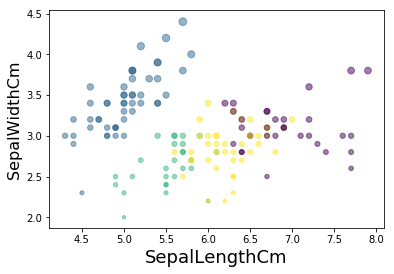

In [9]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('SepalLengthCm', fontsize=18)
plt.ylabel('SepalWidthCm', fontsize=16)

plt.show()

The relation between these two paramters is'nt very significant, there are overlapping patterns which make it less correlatable to each other.





#### 2. PetalLengthCm Vs PetalWidthCm

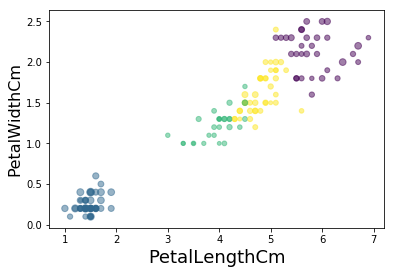

In [10]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 2], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('PetalLengthCm', fontsize=18)
plt.ylabel('PetalWidthCm', fontsize=16)

plt.show()

Wow! we can discretely observe patterns, wherein the two parameters are correlatable.
This is justified by the fact that the 'PetalLengthCm' and  'PetalWidthCm' are linearly related in a positive manner, resulting in sharply distinguishable clusters with minimum overlapping.

#### 3. SepalWidthCm Vs PetalWidthCm

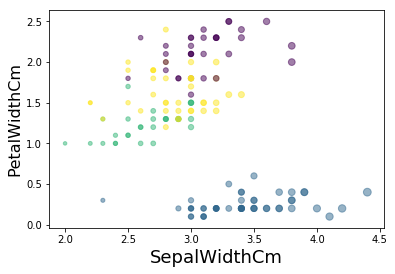

In [11]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('SepalWidthCm', fontsize=18)
plt.ylabel('PetalWidthCm', fontsize=16)

plt.show()

The relation between these two paramters is'nt least significant, to observe any sort of distinguishable patterns.
We conlude by saying that the 'SepalWidthCm' and 'PetalWidthCm' are not correlated to each other.

#### 4. PetalLengthCm Vs SepalLengthCm

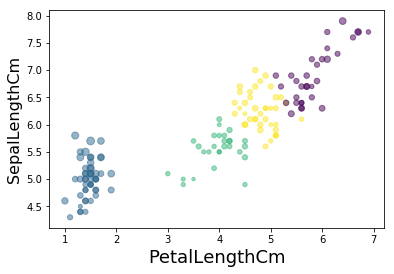

In [12]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 2], X[:, 0], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('PetalLengthCm', fontsize=18)
plt.ylabel('SepalLengthCm', fontsize=16)

plt.show()

Here, we can discretely observe some patterns, wherein the two parameters are correlatable. This is justified by the fact that the 'PetalLengthCm' and 'SepalLengthCm' are linearly related in a positive manner, although there is an overlapping observed initially among the 'blue' and 'yellow' clusters.

## Evaluation of parameters taking three at a time (3-D)

Based on the analysis of the four plots we may interpret that the "SepalWidthCm" is the one and only parameter that does'nt really correlate well to the "SepalLengthCm" and "PetalWidthCm", both of which correlate well among themselves as well as the "PetalLengthCm" parameter.         Based on these observations, we can intuitively say that "SepalWidthCm" parameter is the odd one out.

So, we shall proceed to forming a new dataframe 'df_new' with the "SepalWidthCm" parameter being dropped out and then create a 3-D plot to check if our intuition is correct.

In [13]:
df_new = df_num.drop('Id',axis=1)
df_new = df_new.drop('SepalWidthCm',axis=1)
df_new = df_new.drop('Clus_km',axis=1)

In [15]:
df_new.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [16]:
from sklearn.preprocessing import StandardScaler
Y = df_new.values[:,:]
Y = np.nan_to_num(Y)
Clus_DataSet = StandardScaler().fit_transform(Y)
Clus_DataSet[:5]

array([[-0.90068117, -1.3412724 , -1.31297673],
       [-1.14301691, -1.3412724 , -1.31297673],
       [-1.38535265, -1.39813811, -1.31297673],
       [-1.50652052, -1.2844067 , -1.31297673],
       [-1.02184904, -1.3412724 , -1.31297673]])

In [17]:
x = df_new.iloc[:, [0, 1, 2]].values
x[:5]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

In [24]:
df_new["Clus_km"] = Labels # Adding Labels to the dataframe
df_new.head(5)

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Clus_km
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1


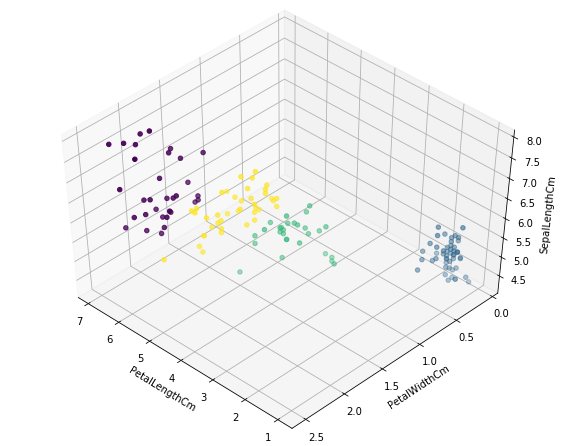

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('SepalLengthCm')

ax.scatter(x[:, 2], x[:, 3], x[:, 0], c= labels.astype(np.float))

Great!

As expected, the three parameters 'PetalLengthCm', 'PetalWidthCm' and 'SepalLengthCm' are corretable to one another. This is evident from the above 3-D plot where we can imagine a plane that can be fit in order to accommodate most of the points, with minimum error.

This concludes the task.